In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from time import time

#Model selection is the process of selecting one final machine learning model 
#from among a collection of candidate machine learning models for a training dataset.
from sklearn import model_selection

#import classifiers from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


#import XGBClassifier
from xgboost import XGBClassifier

# First time installation. Run once.
# !pip install lightgbm

# Import Light Gradient Boosting Classifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

# First time installation. Run once.
#!pip install catboost

# Import Classification Boosting Classifier
from catboost import CatBoostClassifier

In [2]:
# Load dataset from Parksinsons UCI website:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

In [4]:
# read the data set and headers into a pandas dataframe

dataset= pd.read_csv(url)

In [5]:
# print the dataset

display(dataset)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
# print the shape of of the dataset

print(dataset.shape)

(195, 24)


In [7]:
# print the info of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Attribute Information:
## Matrix column entries (attributes):
<li>name - ASCII subject name and recording number</li>
<br><li>MDVP:Fo(Hz) - Average vocal fundamental frequency</li>
<br><li>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</li>
<br><li>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</li>
<br><li>MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency</li>
<br><li>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</li>
<br><li>NHR, HNR - Two measures of the ratio of noise to tonal components in the voice</li>
<br><li>status - The health status of the subject (one) - Parkinson's, (zero) - healthy</li>
<br><li>RPDE, D2 - Two nonlinear dynamical complexity measures</li>
<br><li>DFA - Signal fractal scaling exponent</li>
<br><li>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation</li>

In [8]:
# To see the top 5 records of the dataset

dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
# Print the description of the dataset

dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
# print the patience status - 0 = Healthy, 1 = Parksinson
print(dataset.groupby('status').size())

status
0     48
1    147
dtype: int64


# Feature Engineering

In [11]:
# create a new DataFrame
data = pd.DataFrame()

# copy the dataset to another DataFrame
data = dataset.copy()

# remove name column from data
del data['name']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

# Data Visualization

In [13]:
# count the status of the patients

status_count = data['status'].value_counts()

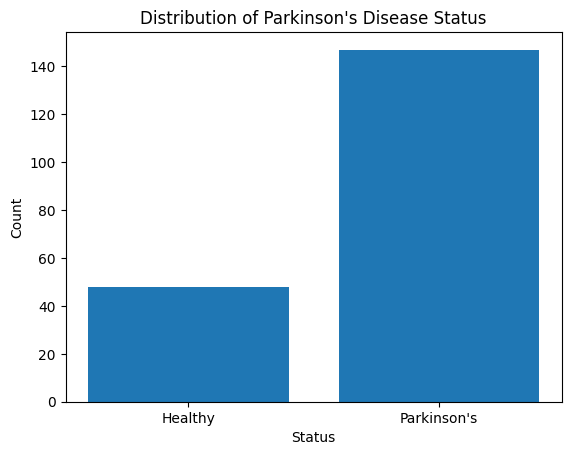

In [14]:
# plot the bar chart using matplotlib

# Create a list of labels for the x-axis
x_labels = ['Healthy', 'Parkinson\'s']

# Create a list of values for the y-axis
y_values = [status_count[0], status_count[1]]

plt.bar(x_labels, y_values)
plt.title('Distribution of Parkinson\'s Disease Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

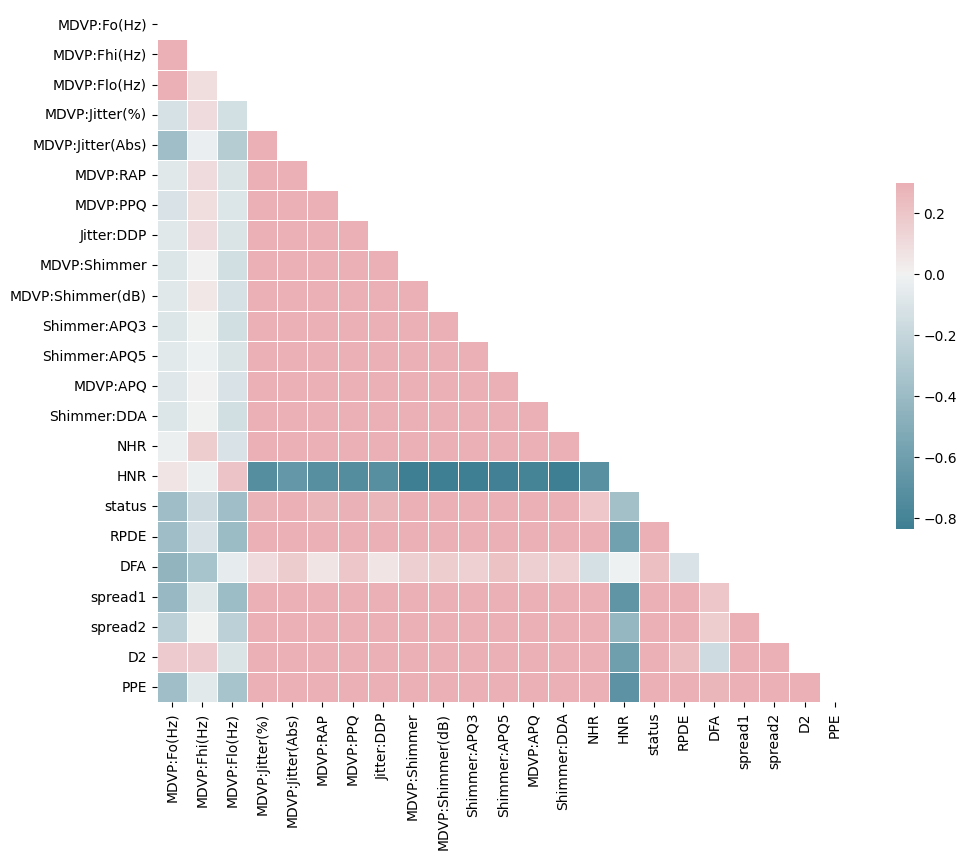

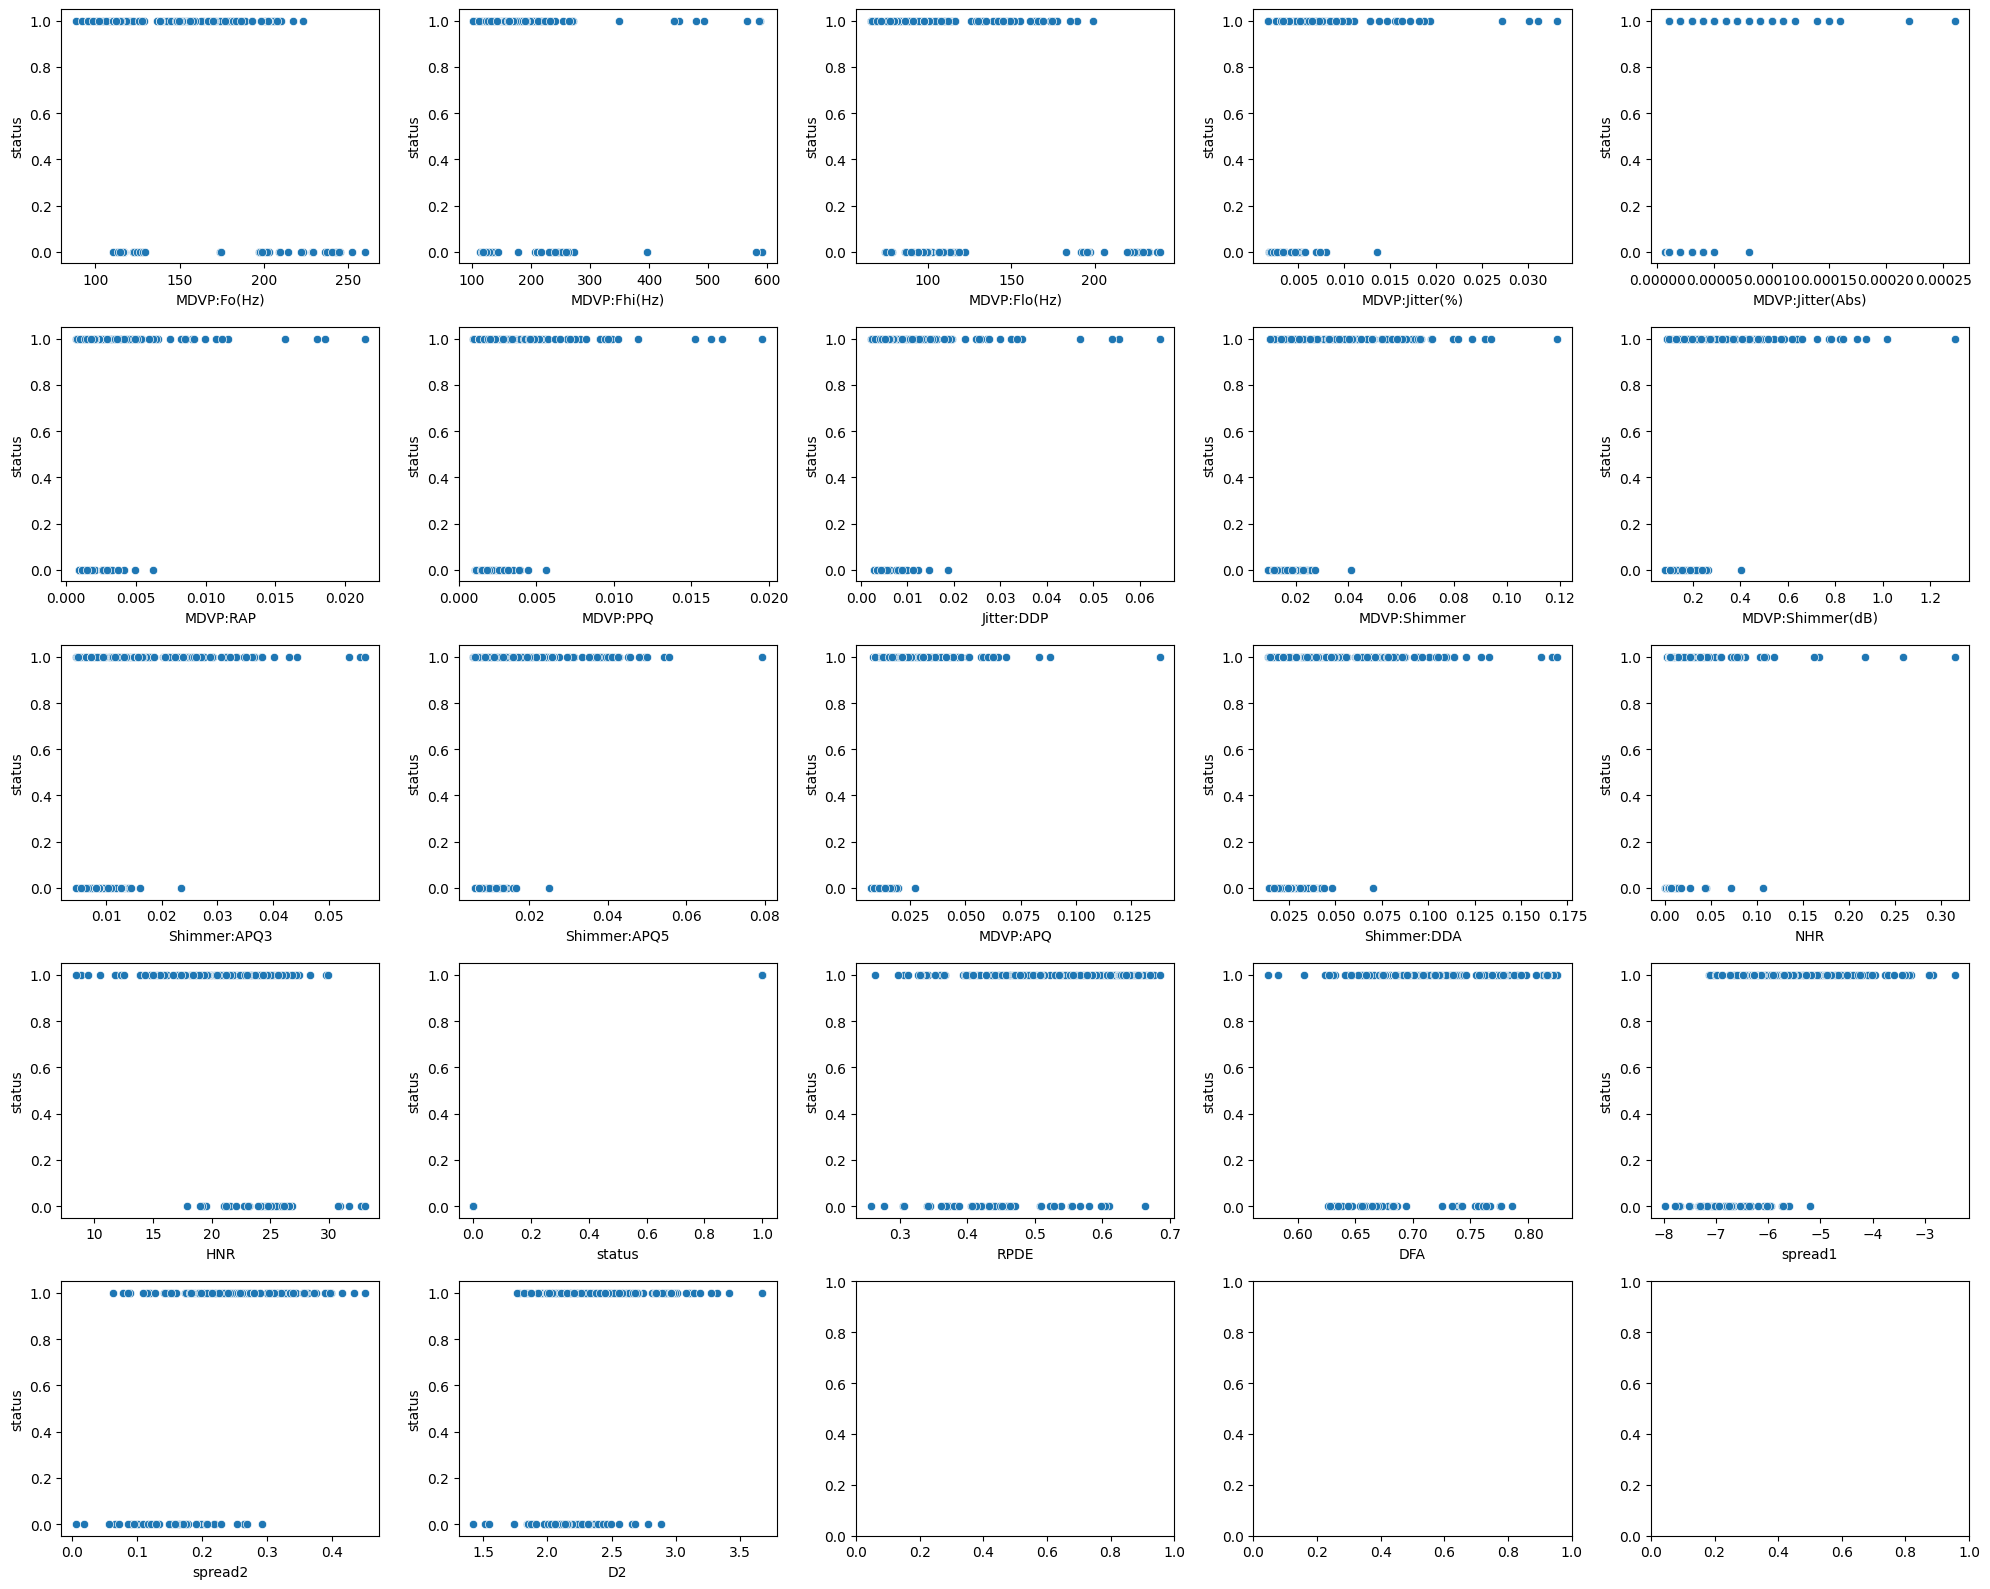

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Create a subplot for each column against "status"
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 16))
axs = axs.flatten()[:-2] # Exclude the last subplot

n_cols = len(data.columns) - 1 # Exclude the last column ("status")
for i in range(n_cols):
    sns.scatterplot(x=data.iloc[:, i], y=data['status'], ax=axs[i])

plt.tight_layout()
plt.show()

In [16]:
# to separate out 2 records from dataset to use for deployment later

# create empty lists to hold the sampled rows
status_0 = []
status_1 = []

# randomly select 1 row with status=0 and 1 row with status=1
status_0.append(data[data['status'] == 0].sample(n=1))
status_1.append(data[data['status'] == 1].sample(n=1))

# remove the selected rows from the dataset
data = data.drop(status_0[0].index)
data = data.drop(status_1[0].index)

# convert the sampled rows to a separate list for deployment
deployment_data = pd.concat([status_0[0], status_1[0]], axis=0)
print(deployment_data)
deployment_data.to_csv("deploy.csv")

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
172      110.739       113.597       100.139         0.00356   
81        95.605       107.715        87.549         0.00702   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
172           0.00003   0.00170   0.00200     0.00510       0.01484   
81            0.00007   0.00428   0.00371     0.01283       0.03156   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR     HNR  status      RPDE  \
172             0.133  ...      0.02261  0.00430  26.550       0  0.369090   
81              0.296  ...      0.05377  0.01825  19.659       1  0.576084   

          DFA   spread1   spread2        D2       PPE  
172  0.776158 -6.085567  0.192375  1.889002  0.174152  
81   0.778747 -5.132032  0.210458  2.232576  0.260633  

[2 rows x 23 columns]


In [17]:
deployment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 172 to 81
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       2 non-null      float64
 1   MDVP:Fhi(Hz)      2 non-null      float64
 2   MDVP:Flo(Hz)      2 non-null      float64
 3   MDVP:Jitter(%)    2 non-null      float64
 4   MDVP:Jitter(Abs)  2 non-null      float64
 5   MDVP:RAP          2 non-null      float64
 6   MDVP:PPQ          2 non-null      float64
 7   Jitter:DDP        2 non-null      float64
 8   MDVP:Shimmer      2 non-null      float64
 9   MDVP:Shimmer(dB)  2 non-null      float64
 10  Shimmer:APQ3      2 non-null      float64
 11  Shimmer:APQ5      2 non-null      float64
 12  MDVP:APQ          2 non-null      float64
 13  Shimmer:DDA       2 non-null      float64
 14  NHR               2 non-null      float64
 15  HNR               2 non-null      float64
 16  status            2 non-null      int64  
 17

# Shuffle and Split the dataset

In [18]:
# Assign the X and Y values

X = data.loc[:, data.columns !='status'].values

y = data.loc[:, 'status'].values

In [19]:
# print the count of X and y

print(X.shape)
print(y.shape)

(193, 22)
(193,)


In [20]:
# Split the data set into a training set (70%) and a test set (30%)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=13)

# Data Standardization

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [24]:
print(X_train)

[[-1.20756861 -0.57009954 -0.72565045 ...  2.14279267  0.48773816
   1.91492494]
 [-0.78422326 -0.76142385 -0.11044758 ... -0.93051304 -0.14812239
  -1.16033386]
 [-0.04878765 -0.40560342  0.57101481 ...  0.17794685  1.26830826
  -0.19470717]
 ...
 [-0.99233395 -0.7543197  -0.16058421 ... -0.31384761 -0.42970528
   0.43130482]
 [-0.03244295 -0.37587354  0.67521984 ... -0.55842126 -0.35913545
  -0.58669304]
 [-1.29520348 -1.07695824 -0.67546105 ... -1.87264219 -0.90189087
  -0.38154845]]


In [25]:
# Load deployment data
deployment_data = pd.read_csv("deploy.csv")

# select the desired columns
df = deployment_data.loc[:, ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']]

# Load scaler with feature names
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df)

# Scale deployment data using the same scaler as used on training data
df_scaled = scaler.transform(df)

# Convert scaled deployment data to pandas DataFrame with feature names
deployment_data_df = pd.DataFrame(df_scaled, columns=df.columns)

# Save deployment data to CSV file
deployment_data_df.to_csv("deployment_data_scaled.csv", index=False)
print(deployment_data_df.head())


   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0          1.0           1.0           1.0            -1.0              -1.0   
1         -1.0          -1.0          -1.0             1.0               1.0   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0      -1.0      -1.0        -1.0          -1.0              -1.0  ...   
1       1.0       1.0         1.0           1.0               1.0  ...   

   MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  spread1  spread2   D2  PPE  
0      -1.0         -1.0 -1.0  1.0  -1.0 -1.0     -1.0     -1.0 -1.0 -1.0  
1       1.0          1.0  1.0 -1.0   1.0  1.0      1.0      1.0  1.0  1.0  

[2 rows x 22 columns]


# Train and Test using different algorithms and evaluate which gives the best score

In [26]:
# Evaluate Algorithms and set their hyperparameters

LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB = GaussianNB()
SVM = SVC(gamma='auto')
XGB = XGBClassifier()
HGBC = HistGradientBoostingClassifier()
LGBMC = LGBMClassifier()
CBC = CatBoostClassifier(verbose=False)
RFC = RandomForestClassifier()

In [27]:
# Train the model using split training data (X_train, y_train)
LR.fit(X_train,y_train)
LDA.fit(X_train,y_train)
KNN.fit(X_train,y_train)
CART.fit(X_train,y_train)
NB.fit(X_train,y_train)
SVM.fit(X_train,y_train)
XGB.fit(X_train,y_train)
HGBC.fit(X_train,y_train)
LGBMC.fit(X_train,y_train)
CBC.fit(X_train,y_train)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Evaluate the model using split test data (X_test, y_test)
accuracy_score_LR = accuracy_score(y_test,LR.predict(X_test))
accuracy_score_LDA = accuracy_score(y_test,LDA.predict(X_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(X_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(X_test))
accuracy_score_NB = accuracy_score(y_test,NB.predict(X_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(X_test))
accuracy_score_XGB = accuracy_score(y_test,XGB.predict(X_test))
accuracy_score_HGBC = accuracy_score(y_test,HGBC.predict(X_test))
accuracy_score_LGBMC = accuracy_score(y_test,LGBMC.predict(X_test))
accuracy_score_CBC = accuracy_score(y_test,CBC.predict(X_test))
accuracy_score_RFC = accuracy_score(y_test,RFC.predict(X_test))

print('LR:',accuracy_score_LR)
print('LDA:',accuracy_score_LDA)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('NB:',accuracy_score_NB)
print('SVM:',accuracy_score_SVM)
print('XGB:',accuracy_score_XGB)
print('HGBC:',accuracy_score_HGBC)
print('LGBMC:',accuracy_score_LGBMC)
print('CBC:',accuracy_score_CBC)
print('RFC:',accuracy_score_RFC)

LR: 0.896551724137931
LDA: 0.9310344827586207
KNN: 0.9655172413793104
CART: 0.8620689655172413
NB: 0.7758620689655172
SVM: 0.9482758620689655
XGB: 0.9482758620689655
HGBC: 0.9482758620689655
LGBMC: 0.9827586206896551
CBC: 0.9827586206896551
RFC: 0.9827586206896551


## Verdict:

The best algorithm seems to be LightGBM, Catboost and Random Forest Classifier, let's evaluate these models using Confusion Matrix.

In [29]:
# Evaluating LightGBM model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, LGBMC.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, LGBMC.predict(X_test)))

Confusion matrix:
[[15  0]
 [ 1 42]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.98      0.99        43

    accuracy                           0.98        58
   macro avg       0.97      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58



In [30]:
# Evaluating Catboost model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, CBC.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, CBC.predict(X_test)))

Confusion matrix:
[[15  0]
 [ 1 42]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.98      0.99        43

    accuracy                           0.98        58
   macro avg       0.97      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58



In [31]:
# Evaluating Random Forest Classifier model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, RFC.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, RFC.predict(X_test)))

Confusion matrix:
[[15  0]
 [ 1 42]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.98      0.99        43

    accuracy                           0.98        58
   macro avg       0.97      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58



### As all 3 models have the same scores, so I will just use Catboost for the rest of this project.

# Building a Predictive System

In [37]:
input_data = [174.688,240.005,74.287,0.0136,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
             ]
# assign feature names to the input data
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
input_data_dict = dict(zip(feature_names, input_data))
input_data_df = pd.DataFrame(input_data_dict, index=[0])

#standardize the data
std_data = scaler.transform(input_data_df)

prediction = CBC.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have Parkinson\'s Disease")
else:
    print("The Person has Parkinson\'s Disease")

[0]
The Person does not have Parkinson's Disease


In [36]:
input_data = [144.188,349.259,82.764,0.00544,0.00008,0.00211,0.00292,0.00632,0.02047,0.192,0.00969,0.012,0.02074,0.02908,0.01859,22.333,0.56738,0.644692,-5.44004,0.239764,2.264501,0.218164]

# assign feature names to the input data
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
input_data_dict = dict(zip(feature_names, input_data))
input_data_df = pd.DataFrame(input_data_dict, index=[0])

#standardize the data
std_data = scaler.transform(input_data_df)

prediction = CBC.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have Parkinson\'s Disease")
else:
    print("The Person has Parkinson\'s Disease")

[1]
The Person has Parkinson's Disease


# Saving the Model

In [38]:
import pickle

In [39]:
filename = 'parkinsons_model.pkl'
pickle.dump(CBC, open('parkinsons_model.pkl','wb'))